![tracker](https://us-central1-vertex-ai-mlops-369716.cloudfunctions.net/pixel-tracking?path=statmike%2Fvertex-ai-mlops%2FApplied+Forecasting&file=BQML+Multivariate+Forecasting+with+ARIMA%2B+XREG.ipynb)
<!--- header table --->
<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/statmike/vertex-ai-mlops/blob/main/Applied%20Forecasting/BQML%20Multivariate%20Forecasting%20with%20ARIMA%2B%20XREG.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo">
      <br>Run in<br>Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https%3A%2F%2Fraw.githubusercontent.com%2Fstatmike%2Fvertex-ai-mlops%2Fmain%2FApplied%2520Forecasting%2FBQML%2520Multivariate%2520Forecasting%2520with%2520ARIMA%252B%2520XREG.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo">
      <br>Run in<br>Colab Enterprise
    </a>
  </td>      
  <td style="text-align: center">
    <a href="https://github.com/statmike/vertex-ai-mlops/blob/main/Applied%20Forecasting/BQML%20Multivariate%20Forecasting%20with%20ARIMA%2B%20XREG.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo">
      <br>View on<br>GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/statmike/vertex-ai-mlops/main/Applied%20Forecasting/BQML%20Multivariate%20Forecasting%20with%20ARIMA%2B%20XREG.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo">
      <br>Open in<br>Vertex AI Workbench
    </a>
  </td>
</table>

---
ToDo List As Model Type Moves from [Preview to GA](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-create-multivariate-time-series):
- [ ] Add comparison of result to Univariate
- [ ] Add univariate as pre-req then parse results to select series for multivariate
- [ ] Keep ToDo list as features come out:
    - [ ] multiple time-series with `time_series_id_col`
        - workarounds presented at end of this notebook
    - [X] explanations
    - [ ] anomalies with `ml.detect_anomalies`
---

# BigQuery ML (BQML) - Multivariate Forecasting with ARIMA+ including external regressors

In this notebook we fit a forecasting model to the data reviewed and prepared in the [preparation notebook](./BigQuery%20Time%20Series%20Forecasting%20Data%20Review%20and%20Preparation.ipynb) - citibike bike rentals daily volume by station near Central Park in New York City.  For this attempt we keep the forecasting activity within the data warehouse by using BigQuery's built-in machine learning - often called BQML.  One of the model types available is ARIMA+ XREG (`model_type = 'ARIMA_PLUS_XREG'`).  This fits multivariate forecasts by using auto-regressive integrated moving average (ARIMA) models while also automatically handling many of the data pre and post processing steps required as well as including time varying covariates and linear regressors.  Each station will be forecasted separately by simply providing the station names as `start_station_name` to the input parameter `time_series_id_col` (**this is not yet available and a `WHERE` clause is used to limit the data to a single station. A workaround is demonstrated at the end of this notebook**).  The forecast will be evaluated with various provided metrics and we will use SQL to calculate customized metrics.  It is even possible to identify anomalies using BigQuery ML with the function `ML.DETECT_ANOMALIES`.

**MULTIVARIATE Forecasting with ARIMA+ including Linear External Regressors**

One of the model type available is ARIMA+ with XREG (`model_type = 'ARIMA_PLUS_XREG'`).  This  fits multivariate forecasts by using time variying covariates as linear external regressors.  This is an extention of ARIMA+ univariate forecasting where the inclusing of additional information can improve the forecast accuracy.  The weights from a linear regression of the covariates is aggregated with the ARIMA forecasts.

**UNIVARIATE Forecasting with ARIMA+**

Univariate forecasting with ARIMA+ is available directly with (`model_type = 'ARIMA_PLUS'`).  This fits univariate forecasts by using auto-regressive integrated moving average (ARIMA) models while also automatically handling many of the data pre and post processing steps required.  The forecast can be evaluated with various provided metrics and even using SQL to calculate customized metrics.  It is also possible to identify anomalies using BigQuery ML with the function `ML.DETECT_ANOMALIES`.  This model type is fit in the notebook [BQML Univariate Forecasting with ARIMA+](./BQML%20Univariate%20Forecasting%20with%20ARIMA+.ipynb).

**ARIMA+**

ARIMA is a statistical model of time series data that helps understand patterns and forecast future points in time.  The model is made up of three parts:
- AR, or autoregressive.  Indicates a variable is regressed against it own previous values.
    - `p`, the parameter that indicates the number of lags, or previous time points considered
- I, or integrated.  Indicates the values have been replaced with the difference between a value and the previous value.
    - `d`, the parameter that indicates the degree of differencing or number of times the data have had past value subtracted 
- MA, or moving avarge.  Indicates the regression error is a combination of value at various time in the past.
    - `q`, the parameter that indicates the order of the moving-average

Reference:
- [ARIMA](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average)

**ARIMA+ XREG**

This can be thought of a ARIMAX.  The additional letter stands for external regressors.  As an extention of ARIMA is still has the `p`, `d` and `q` parameters and adds a parameter `b`:
- X, or external regressors.  Indicates time varying regressors are included.
    - `b`, the parameter for the number of weights from a linear regression of the external regressors

---

**Series Overview**

[This series](./readme.md) explores forecasting with Vertex AI, BigQuery ML, and additional open source frameworks.  Forecasting consist of following a measurement over time and exploring trends, the impact of seasonality (years, months, days, etc), holidays, and special events with the hope of using these insights to forecast into the near future.  Some method also incoporate observable measurements that impact demand to understand the relationships and make forecasting more accurate.

**Data Source: Citibike rentals in New York City**

This series uses Citibike rentals in New York city.  The bike stations near central park will be selected and the daily number bike trips that orignate from these stations will be followed over time.  This will illustrate some common forecasting issues due to new stations being introduced over time and some stations only have the most recent few months, or just weeks of data.  The data are found in the BigQuery Public datasets at:: 
- `bigquery-public-data.new_york.citibike_trips`
- `bigquery-public-data.new_york.citibike_stations`

**BigQuery ML (BQML) Overview**

[BigQuery ML](https://cloud.google.com/bigquery/docs/bqml-introduction) allows you to use `SQL` to constuct an ML workflow.  This is a great leap in productivity and flexibility when the data source is [BigQuery](https://cloud.google.com/bigquery/docs/introduction) and users are already familiar with `SQL`. Using just `SQL`, [multiple techniques](https://cloud.google.com/bigquery/docs/bqml-introduction#model_selection_guide) can be used for model training and even include [hyperparameter tuning](https://cloud.google.com/bigquery/docs/hp-tuning-overview).  It includes serverless [training, evaluation, and inference](https://cloud.google.com/bigquery/docs/e2e-journey) techniques for supervised, unsupervised, time series methods, even recommendation engines.  [Predictions](https://cloud.google.com/bigquery/docs/inference-overview) can be served directly in BigQuery which also include explainability measures. Predictive models can be [exported to their native framework](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-export-model) for portability, or even directly [registered to Vertex AI model registry](https://cloud.google.com/bigquery/docs/create_vertex) for online predictions on Vertex AI Endpoints.  You can [import models into BigQuery ML](https://cloud.google.com/bigquery/docs/inference-overview#inference_using_imported_models) from many common frameworks, or [connect to remotely hosted models](https://cloud.google.com/bigquery/docs/inference-overview#inference_using_remote_models) on Vertex AI Endpoints. You can even directly use many [pre-trained models](https://cloud.google.com/bigquery/docs/inference-overview#pretrained-models) in Vertex AI Like Cloud Vision API, Cloud Natural Language API, Cloud Translate API, and Generative AI with Vertex AI hosted LLMs.

A great starting point for seeing the scope of available methods is the [user journey for models](https://cloud.google.com/bigquery/docs/e2e-journey).  This repository also has a series of notebook based workflows for many BigQuery ML methods that can be reviewed here: [../03 - BigQuery ML (BQML)](../03%20-%20BigQuery%20ML%20(BQML)/readme.md).

---

**Prerequisites:**
- [BigQuery Time Series Forecasting Data Review and Preparation](./BigQuery%20Time%20Series%20Forecasting%20Data%20Review%20and%20Preparation.ipynb)
    - prepare data for this notebook

**Resources:**
- [BigQuery](https://cloud.google.com/bigquery/docs/introduction)
    - [BigQuery Python Client](https://cloud.google.com/python/docs/reference/bigquery/latest)
    - [BigQuery ML](https://cloud.google.com/python/docs/reference/bigquery/latest)
    - [SQL Reference](https://cloud.google.com/bigquery/docs/reference/standard-sql/query-syntax)
    - [BigQuery ML SQL Reference](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-create-time-series)
- [Bigquery ML End-to-end user journey for each model](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-e2e-journey)
- Blog: [How to do multivariate time series forecasting in BigQuery ML](https://cloud.google.com/blog/products/data-analytics/how-to-do-multivariate-time-series-forecasting-in-bigquery-ml)
- [Vertex AI Forecast: An Overview](https://cloud.google.com/blog/topics/developers-practitioners/vertex-forecast-overview)
- [Codelab: Time Series Forecasting with Vertex AI and BigQuery ML](https://codelabs.developers.google.com/codelabs/time-series-forecasting-with-cloud-ai-platform#0)

**Conceptual Flow & Workflow**
<p align="center">
  <img alt="Conceptual Flow" src="../architectures/slides/afore2_arch.png" width="45%">
&nbsp; &nbsp; &nbsp; &nbsp;
  <img alt="Workflow" src="../architectures/slides/afore2_console.png" width="45%">
</p>

---
## Colab Setup

To run this notebook in Colab click [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/statmike/vertex-ai-mlops/blob/main/Applied%20Forecasting/BQML%20Multivariate%20Forecasting%20with%20ARIMA%2B%20XREG.ipynb) and run the cells in this section.  Otherwise, skip this section.

This cell will authenticate to GCP (follow prompts in the popup).

In [1]:
PROJECT_ID = 'statmike-mlops-349915' # replace with project ID

In [473]:
try:
    import google.colab
    from google.colab import auth
    auth.authenticate_user()
    !gcloud config set project {PROJECT_ID}
except Exception:
    pass

---
## Installs and API Enablement

The clients packages may need installing in this environment. 

### Installs (If Needed)

In [4]:
# tuples of (import name, install name)
packages = [
    ('plotly', 'plotly'),
    ('kaleido', 'kaleido')
]

import importlib
install = False
for package in packages:
    if not importlib.util.find_spec(package[0]):
        print(f'installing package {package[1]}')
        install = True
        !pip install {package[1]} -U -q --user

### Restart Kernel (If Installs Occured)

After a kernel restart the code submission can start with the next cell after this one.

In [5]:
if install:
    import IPython
    app = IPython.Application.instance()
    app.kernel.do_shutdown(True)

---
## Setup

inputs:

In [1]:
project = !gcloud config get-value project
PROJECT_ID = project[0]
PROJECT_ID

'statmike-mlops-349915'

In [2]:
REGION = 'us-central1'
EXPERIMENT = 'bqml-arimaplusxreg'
SERIES = 'applied-forecasting'

BQ_PROJECT = PROJECT_ID
BQ_DATASET = SERIES.replace('-','_')
BQ_TABLE = 'forecasting-data_prepped'

viz_limit = 12

packages:

In [3]:
from google.cloud import bigquery

import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'iframe'

clients:

In [4]:
bq = bigquery.Client(project = PROJECT_ID)

---
## Review Time Series

**Univariate Forecasting** consists of just 2 columns per time series:
- `TARGET_COLUMN` = The demand measurment.
    In our case it is the number of trips taken per day from a particular bike station - the sum of trips for a day.
- `TIME_COLUMN` = The time of demand.
    Expressed in the time or date units related to the granularity of the forecast exercise.  In our case, demand is measured daily so the time column is prepared as a date.

**Additional Columns** are used to instruct the forecasting algorithms handling of the data:
- `SERIES_COLUMN` groups rows associated with the same time series.
    - Conducting multiple forecasts, one per time series, means including a third column to capture the groups of row for each time series: `SERIES_COLUMN`.
    - **NOTE:** BigQuery ARIMA+ fits separate forecast for each time series. 
- `SPLITS_COLUMN` groups sequential rows within each time series for their purpose during the forecasting exercise.
    - This data was prepared with splits for `TRAIN`, `VALIDATE` and `TEST` in the prerequisite notebooks.  The column that contains these splits can be used by the choosen forecast method during training rather than have the method calculate the splits.  This can be helpful when comparing multiple different methods as it ensures splitting is handled the same across each method.
- `COVARIATE_COLUMNS` is a list of columns that measure additional features over time.  Some forcasting methods can use these to imporove the understanding of trends and make better forecasts.  Univarate forecast methods will not use these.  To use a covariate for forecasting then its value needs to be know in advance to be used when making predictions, or the forecast method will need to have special handling for unknown covariates.  The three types of covariate information are:
    - Attributes
        - Values that do not change over time but describe what the time series represents.  In our case a bike station might be identified by latitude and longitude, color, number of bike slots.
    - Covariates that are available at forecast time (in advance)
        - These are measurements that can be known ahead of time like when holidays occur, promotions, events, changes in capacity.
    - Covariates that are unavailable at forecast time (in advance)
        - Measurements that change over time but are not known until the time of measurment like rain, other weather, foot traffic, and queue length.

**Forecasting Parameters**:
- `FORECAST_GRANULARITY` is the frequency of measurment like MINUTE, HOUR, DAY, WEEK, MONTH, YEAR
    - The data was summarized at the DAY level in the data preparation notebook
    - This is the amount of time between measurments - rows  
    - For a different granularity, you may need to summarize the demand signal as a `SUM`, `MIN`, `MAX`, or `AVERAGE` for different time components.
    - specification of granularity differs by method:
        - BigQuery ML: PER_MINUTE, HOURLY, DAILY, WEEKLY, MONTHLY, QUARTERLY, YEARLY
        - Prophet (including Vertex Pre-Built Pipelines): minute, hour, day, week, month, or year
        - Vertex AI AutoML: minute, hour, day, week, month, year
    - A very helpful BigQuery function for extracting components of times and dates is the `EXTRACT` function:
        - [EXTRACT as a date function](https://cloud.google.com/bigquery/docs/reference/standard-sql/date_functions#extract)
        - [EXTRACT as a time function](https://cloud.google.com/bigquery/docs/reference/standard-sql/time_functions#extract)
        - [EXTRACT as a datetime function](https://cloud.google.com/bigquery/docs/reference/standard-sql/datetime_functions#extract).
- `FORECAST_TEST_LENGTH` is the number of rows allocated to the test region
    - This is in the units of `FORECAST_GRANULARITY`.
    - The data preparation included setting this for specifying the `SPLITS_COLUMN = 'TEST'` values for each time series in `SERIES_COLUMMN`.
- `FORCAST_VALIDATE_LENGTH` is the number of rows allocated to the validation region
    - This is in the units of `FORECAST_GRANULARITY`.
    - The data preparation included setting this for specifying the `SPLITS_COLUMN = 'VALIDATE'` values for each time series in `SERIES_COLUMN`.
- `FORECAST_HORIZON_LENGTH` is the number of rows to forecast into the future beyond the test region
    - This is in the units of `FORECAST_GRANULARITY`
    - This needs to be set as an input to the forecast method

In [5]:
# CUSTOMIZE
TARGET_COLUMN = 'num_trips'
TIME_COLUMN = 'starttime'
SERIES_COLUMN = 'start_station_name'
SPLIT_COLUMN = 'splits'
COVARIATE_COLUMNS = ['avg_tripduration', 'pct_subscriber', 'ratio_gender', 'capacity'] # could be empty

# CUSTOMIZE
FORECAST_GRANULARITY = 'DAILY' # the data preparation included preparing the data at this level
FORECAST_HORIZON_LENGTH = 14
FORECAST_TEST_LENGTH = 14 # the data preparation included setting this value for splits = TEST
FORECAST_VALIDATE_LENGTH = 14 # the data preparation included setting this value for splits = VALIDATE

Retrieve Key Dates for splits:

In [6]:
query = f"""
    WITH
        SPLIT AS (
            SELECT splits, min({TIME_COLUMN}) as mindate, max({TIME_COLUMN}) as maxdate
            FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`
            GROUP BY {SPLIT_COLUMN}
        ),
        TRAIN AS (
            SELECT mindate as start_date
            FROM SPLIT
            WHERE {SPLIT_COLUMN} ='TRAIN'
        ),
        VAL AS (
            SELECT mindate as val_start
            FROM SPLIT
            WHERE {SPLIT_COLUMN} = 'VALIDATE'
        ),
        TEST AS (
            SELECT mindate as test_start, maxdate as end_date
            FROM SPLIT
            WHERE splits = 'TEST'
        )
    SELECT * EXCEPT(pos) FROM
    (SELECT *, ROW_NUMBER() OVER() pos FROM TRAIN)
    JOIN (SELECT *, ROW_NUMBER() OVER() pos FROM VAL)
    USING (pos)
    JOIN (SELECT *, ROW_NUMBER() OVER() pos FROM TEST)
    USING (pos)
"""
keyDates = bq.query(query).to_dataframe()
keyDates

,start_date,val_start,test_start,end_date
0,2013-07-01,2016-09-03,2016-09-17,2016-09-30


Retrieve raw data:

In [7]:
query = f"""
    SELECT {SERIES_COLUMN}, {TIME_COLUMN}, {TARGET_COLUMN}, {SPLIT_COLUMN},
        {', '.join(COVARIATE_COLUMNS)}
    FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`
    ORDER by {SERIES_COLUMN}, {TIME_COLUMN}
"""
rawSeries = bq.query(query).to_dataframe()

**NOTE DURING Initial Release**

Only one series is forecasted because the `time_series_id_col` parameter is not yet available.  The chosen `start_station` value for this notebook is: 'Central Park S & 6 Ave'.

To do multiple forecast there are several workarounds shown at the bottom of this notebook.

In [8]:
chosen_station = 'Central Park S & 6 Ave'
rawSeries = rawSeries[rawSeries[SERIES_COLUMN]==chosen_station]

### Plot Time Series - Overlay Covariates

Create an interactive chart for review individual time series (bike stations) and scrolling through the time range by using [Plotly](https://plotly.com/python/):

In [9]:
# NA values in Pandas will not convert to JSON which Plotly uses:
rawSeries = rawSeries.fillna(np.nan).replace([np.nan], [None])

# create a figure:
fig = go.Figure()

# get a list of colors to use:
colors = px.colors.qualitative.Plotly

# list of columns to plot over time : target and covariates
variables = [TARGET_COLUMN] + COVARIATE_COLUMNS

# create dropdown/button to toggle series
buttons = []
b = 0 # default button index

# iterate through series:
series = rawSeries[SERIES_COLUMN].unique().tolist()[0:viz_limit]
for s in series:
    # iterate trhough columns
    for y, v in enumerate(variables):
        fig.add_trace(
            go.Scatter(
                x = rawSeries[rawSeries[SERIES_COLUMN]==s][TIME_COLUMN],
                y = rawSeries[rawSeries[SERIES_COLUMN]==s][v],
                name = f'{v}',
                text = rawSeries[rawSeries[SERIES_COLUMN]==s][v],
                yaxis = f"y{y+1}",
                hoverinfo='name+x+text',
                line = {'width': 0.5},
                marker = {'size': 8},
                mode = 'lines+markers',
                showlegend = False,
                visible = (b==0) # make a series visible as default: this uses the first series
            )
        )
    
    # which button to show:
    ff = 0 # count of forecast related traces add to each series
    which_buttons = [False] * len(series) * (len(variables) + ff)
    which_buttons[b * (len(variables) +ff):(b+1)*(len(variables) + ff)] = [True] * (len(variables) + ff)

    # create button for series:
    button = dict(
        label = s,
        method = 'update',
        args = [{'visible': which_buttons}]
    )
    buttons.append(button)
    b += 1

# add split regions: training
fig.add_shape(
    fillcolor = 'rgba(0, 255, 0, 0.2)',
    line = {'width': 0},
    type = 'rect',
    x0 = keyDates['start_date'][0],
    x1 = keyDates['val_start'][0],
    xref = 'x',
    y0 = 0,
    y1 = 1,
    yref = 'paper'
)
fig.add_annotation(
    x = keyDates['val_start'][0] - (keyDates['test_start'][0]-keyDates['val_start'][0])/2,
    y = 0,
    ax = 0, ay = 0,
    yref = 'y1',
    xref = 'x',
    text = 'Training',
    yanchor = 'bottom'
)

# add split regions: validation
fig.add_shape(
    fillcolor = 'rgba(255, 255, 0, 0.2)',
    line = {'width': 0},
    type = 'rect',
    x0 = keyDates['val_start'][0],
    x1 = keyDates['test_start'][0],
    xref = 'x',
    y0 = 0,
    y1 = 1,
    yref = 'paper'
)
fig.add_annotation(
    x = keyDates['val_start'][0] + (keyDates['test_start'][0]-keyDates['val_start'][0])/2,
    y = 0,
    ax = 0, ay = 0,
    yref = 'y1',
    xref = 'x',
    text = 'Validation',
    yanchor = 'bottom'
)

# add split regions: test
fig.add_shape(
    fillcolor = 'rgba(0, 0, 255, 0.2)',
    line = {'width': 0},
    type = 'rect',
    x0 = keyDates['test_start'][0],
    x1 = keyDates['end_date'][0],
    xref = 'x',
    y0 = 0,
    y1 = 1,
    yref = 'paper'
)
fig.add_annotation(
    x = keyDates['test_start'][0] + (keyDates['end_date'][0]-keyDates['test_start'][0])/2,
    y = 0,
    ax = 0, ay = 0,
    yref = 'y1',
    xref = 'x',
    text = 'Test',
    yanchor = 'bottom'
)

# configure axes layout:
layout = dict(
    xaxis =  dict(
        range = [keyDates['end_date'][0] - 2*(keyDates['end_date'][0] - keyDates['val_start'][0]), keyDates['end_date'][0]],
        rangeslider = dict(
            autorange = True,
            range = [keyDates['start_date'][0], keyDates['end_date'][0]]
        ),
        type = 'date'
    )
)
for v, variable in enumerate(variables):
    layout[f'yaxis{v+1}'] = dict(
        anchor = 'x',
        domain = [v*(1/len(variables)), (v+1)*(1/len(variables))],
        autorange = True,
        mirror = True,
        autoshift = True,
        title = dict(text = variable, standoff = 10 + 20 * (v % 2), font = dict(color = colors[v])),
        tickfont = dict(color = colors[v]),
        tickmode = 'auto',
        linecolor = colors[v],
        linewidth = 4,
        showline = True,
        side = 'right',
        type = 'linear',
        zeroline = False
    )

# final update of display before rendering
fig.update_layout(
    layout,
    title = 'Time Series Plots:',
    dragmode="zoom",
    hovermode="x",
    legend=dict(traceorder="reversed"),
    height=600,
    template="plotly_white",
    margin=dict(
        t=100,
        b=100
    ),
    updatemenus = [
        dict(
            buttons = buttons,
            type = 'dropdown',
            direction = 'down',
            x = 1,
            y = 1.2,
            showactive = True
        )
    ]
)

# render the interactive plot:
fig.show()

A Snapshot of the interactive plot:


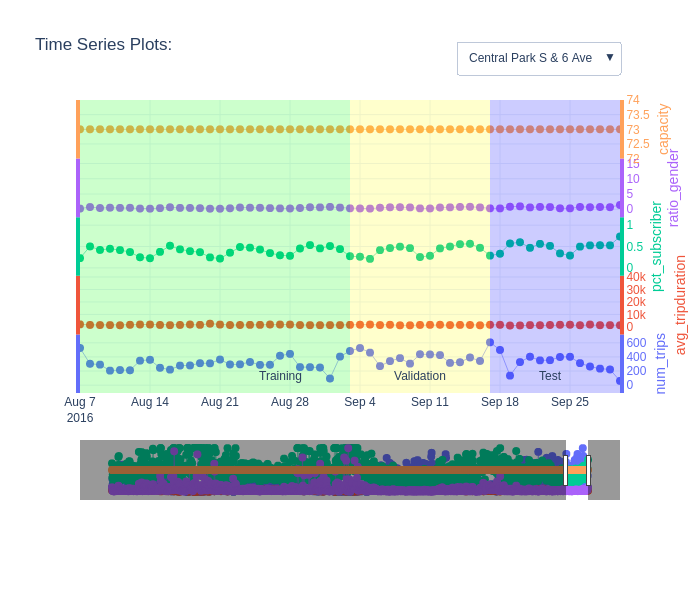

In [10]:
print('A Snapshot of the interactive plot:')
fig.show('png')

---
## Create Forecast Model
Reference for [`model_type = 'ARIMA_PLUS_XREG'`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-create-multivariate-time-series)

Use BigQuery ML Arima+ XREG (`model_type = 'ARIMA_PLUS_XREG'`), a feature of [BigQuery ML](https://cloud.google.com/bigquery/docs/e2e-journey).  This does univariate time series modeling using ARIMA while also automating many of the task of this type of inference: preprocessing, holiday adjustments, spikes, dips, outlier, seasonal & trend decomposition, step change adjustment, trend modeling, forecasting.  A representation of this pipeline from the BigQuery ML documentation:

<p><center>
    <img alt="ARIMA_PLUS_XREG Flowchart" src="https://cloud.google.com/static/bigquery/images/BQ_ARIMA_PLUS_XREG_diagram.png" width="75%">
</center><p>
    
A deeper look at the ARIMA+ process:   
    
<p><center>
    <img alt="ARIMA_PLUS Flowchart" src="https://cloud.google.com/static/bigquery/images/BQ_ARIMA_diagram.png" width="75%">
</center><p>

**Note: A where statement is used to forecast a single station**
>(**FUTURE**) Multiple time series are forcasted at the same time, each individual station near Central Park, using the `time_series_id_col >= ` input.

**Note:** ARIMA forecasting is univariate and does not use the validation data so we include it with the training data here:

In [11]:
query = f"""
    CREATE OR REPLACE MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_arimaplusxreg`
    OPTIONS
      (model_type = 'ARIMA_PLUS_XREG',
       time_series_timestamp_col = '{TIME_COLUMN}',
       time_series_data_col = '{TARGET_COLUMN}',
       #time_series_id_col = '{SERIES_COLUMN}',
       data_frequency = '{FORECAST_GRANULARITY}',
       auto_arima_max_order = 5,
       holiday_region = ['GLOBAL', 'US'],
       horizon = {FORECAST_HORIZON_LENGTH} + {FORECAST_TEST_LENGTH}
      ) AS
    SELECT {TIME_COLUMN}, {TARGET_COLUMN},
        {', '.join(COVARIATE_COLUMNS)}
    FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`
    WHERE {SPLIT_COLUMN} in ('TRAIN','VALIDATE')
        AND {SERIES_COLUMN} = '{chosen_station}'
"""
print(query)


    CREATE OR REPLACE MODEL `statmike-mlops-349915.applied_forecasting.forecasting-data_prepped_arimaplusxreg`
    OPTIONS
      (model_type = 'ARIMA_PLUS_XREG',
       time_series_timestamp_col = 'starttime',
       time_series_data_col = 'num_trips',
       #time_series_id_col = 'start_station_name',
       data_frequency = 'DAILY',
       auto_arima_max_order = 5,
       holiday_region = ['GLOBAL', 'US'],
       horizon = 14 + 14
      ) AS
    SELECT starttime, num_trips,
        avg_tripduration, pct_subscriber, ratio_gender, capacity
    FROM `statmike-mlops-349915.applied_forecasting.forecasting-data_prepped`
    WHERE splits in ('TRAIN','VALIDATE')
        AND start_station_name = 'Central Park S & 6 Ave'



In [12]:
job = bq.query(query)
job.result()
print(job.state, (job.ended-job.started).total_seconds())

DONE 33.76


In [13]:
print(f'Review The Model in The BigQuery Console:\nhttps://console.cloud.google.com/bigquery?project={PROJECT_ID}&ws=!1m5!1m4!5m3!1s{BQ_PROJECT}!2s{BQ_DATASET}!3s{BQ_TABLE}_arimaplusxreg&pli=1')

Review The Model in The BigQuery Console:
https://console.cloud.google.com/bigquery?project=statmike-mlops-349915&ws=!1m5!1m4!5m3!1sstatmike-mlops-349915!2sapplied_forecasting!3sforecasting-data_prepped_arimaplusxreg&pli=1


### Review The ARIMA Coefficients
Reference for [`ML.ARIMA_COEFFICIENTS`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-arima-coefficients)

In [14]:
query = f"""
    SELECT *
    FROM ML.ARIMA_COEFFICIENTS(MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_arimaplusxreg`)
"""
coefficients = bq.query(query).to_dataframe()
coefficients

,ar_coefficients,ma_coefficients,intercept_or_drift,processed_input,weight,category_weights
0,[],[],NaN,avg_tripduration,-1.513919e-03,[]
1,[],[],NaN,pct_subscriber,-3.021674e+02,[]
2,[],[],NaN,ratio_gender,2.385852e+00,[]
3,[],[],NaN,capacity,1.663402e+00,[]
4,[],[],NaN,__INTERCEPT__,-3.435246e-11,[]
5,[],"[-0.6799177435713923, -0.4179312249870092, 0.7...",0.0,None,NaN,[]


### Review the input features
Reference for [`ML.FEATURE_INFO`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-feature)

In [15]:
query = f"""
    SELECT *
    FROM ML.FEATURE_INFO(MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_arimaplusxreg`)
"""
featureInfo = bq.query(query).to_dataframe()
featureInfo.head()

,input,min,max,mean,median,stddev,category_count,null_count,dimension
0,num_trips,1.000,555.000000,144.153912,130.000000,112.409702,<NA>,0,<NA>
1,starttime,NaN,NaN,NaN,NaN,NaN,1163,0,<NA>
2,avg_tripduration,336.625,34597.615385,1918.560216,1836.544000,1334.905339,<NA>,0,<NA>
3,pct_subscriber,0.000,1.000000,0.497785,0.467290,0.214707,<NA>,0,<NA>
4,ratio_gender,0.000,14.000000,0.908012,0.555556,1.329083,<NA>,26,<NA>


### Review the Training Information
Reference for [`ML.TRAINING_INFO`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-train)

In [16]:
query = f"""
    SELECT *
    FROM ML.TRAINING_INFO(MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_arimaplusxreg`)
"""
trainingInfo = bq.query(query).to_dataframe()
trainingInfo.head()

,training_run,iteration,duration_ms
0,0,0,4376


---
## Forecast Evaluation

### Forecast Metrics
Reference for [`ML.EVALUATE`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-evaluate) for `model_type = 'ARIMA_PLUS_XREG'`

The metrics returned depend on if input (test) data is provided and if `perform_aggregation` is `True` or `False`.  If `False` then metrics per timestamp are provide, and if `True` then metrics per `time_series_id_col` are provided.

In [17]:
query = f"""
    SELECT *
    FROM ML.EVALUATE(
        MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_arimaplusxreg`,
        (
            SELECT {TIME_COLUMN}, {TARGET_COLUMN},
                {', '.join(COVARIATE_COLUMNS)}
            FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`
            WHERE {SPLIT_COLUMN} = 'TEST'
                AND {SERIES_COLUMN} = '{chosen_station}'
        ),
        STRUCT(TRUE AS perform_aggregation))
"""
metrics = bq.query(query).to_dataframe()
metrics

,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error,symmetric_mean_absolute_percentage_error
0,84.869258,12786.969584,113.079483,36.418356,31.541218


### Evaluate Time Series Models
Reference for [`ML.ARIMA_EVALUATE`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-arima-evaluate)

A model metrics table:
ARIMA terms:
- p = how many autoregressive terms
- d =  how many nonseasonal differences needed for stationarity
- q = number of lagged forecast errors (moving average part)


In [18]:
query = f"""
    SELECT *
    FROM ML.ARIMA_EVALUATE(
        MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_arimaplusxreg`,
        STRUCT(FALSE as show_all_candidate_models))
"""
arima_metrics = bq.query(query).to_dataframe()
arima_metrics

,non_seasonal_p,non_seasonal_d,non_seasonal_q,has_drift,log_likelihood,AIC,variance,seasonal_periods,has_holiday_effect,has_spikes_and_dips,has_step_changes,error_message
0,0,1,5,False,-5786.440397,11584.880793,1119.496349,"[WEEKLY, YEARLY]",True,True,False,


### Holiday Effects In The Model
Reference for [`ML.HOLIDAY_INFO`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-holiday-info)

A list of holidays being modeled and have detected holiday effects:
- `region`, these were specified in the `CREATE MODEL` statement with parameter `holiday_region`
- `holiday_name` is the name of the holiday with detect effect
- `primary_date` is the calender date of the holiday
- `preholiday_days` and `postholiday_days` are the integer window around the holiday taken into account during modeling

In [19]:
query = f"""
    SELECT *
    FROM ML.HOLIDAY_INFO(
        MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_arimaplusxreg`)
"""
holiday_info = bq.query(query).to_dataframe()
holiday_info

,region,holiday_name,primary_date,preholiday_days,postholiday_days
0,GLOBAL,AllSaintsDay-Halloween,2000-10-31,1,1
1,GLOBAL,AllSaintsDay-Halloween,2001-10-31,1,1
2,GLOBAL,AllSaintsDay-Halloween,2002-10-31,1,1
3,GLOBAL,AllSaintsDay-Halloween,2003-10-31,1,1
4,GLOBAL,AllSaintsDay-Halloween,2004-10-31,1,1
...,...,...,...,...,...
1619,US,VeteranDay,2026-11-11,1,1
1620,US,VeteranDay,2027-11-11,1,1
1621,US,VeteranDay,2028-11-11,1,1
1622,US,VeteranDay,2029-11-11,1,1


---
## Forecast Time Series
Reference for [`ML.FORECAST`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-forecast)

Calculates the forecasted value per timestamp and provides standard error and prediction intervals at the requested confidence level.

The default `horizon` is 3 so this parameter may need to be set to the size used at training.

**NOTE** When using external regressors their values are need for forecast to be computed.

In [20]:
query = f"""
    SELECT *
    FROM ML.FORECAST(
        MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_arimaplusxreg`,
        STRUCT({FORECAST_TEST_LENGTH} AS horizon, 0.95 AS confidence_level),
        (
            SELECT {TIME_COLUMN}, {TARGET_COLUMN},
                {', '.join(COVARIATE_COLUMNS)}
            FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`
            WHERE {SPLIT_COLUMN} = 'TEST'
                AND {SERIES_COLUMN} = '{chosen_station}'
        )
        )
"""
forecast = bq.query(query).to_dataframe()
forecast

,forecast_timestamp,forecast_value,standard_error,confidence_level,prediction_interval_lower_bound,prediction_interval_upper_bound
0,2016-09-17 00:00:00+00:00,358.241628,33.458879,0.95,292.780734,423.702522
1,2016-09-18 00:00:00+00:00,491.458902,35.131070,0.95,422.726436,560.191367
2,2016-09-19 00:00:00+00:00,332.215678,35.283290,0.95,263.185399,401.245957
3,2016-09-20 00:00:00+00:00,165.155313,40.727100,0.95,85.474449,244.836176
4,2016-09-21 00:00:00+00:00,248.723881,48.710074,0.95,153.424662,344.023099
5,2016-09-22 00:00:00+00:00,260.924205,48.763952,0.95,165.519576,356.328833
6,2016-09-23 00:00:00+00:00,278.543954,48.817770,0.95,183.034032,374.053875
7,2016-09-24 00:00:00+00:00,324.208685,48.871529,0.95,228.593586,419.823784
8,2016-09-25 00:00:00+00:00,380.716377,48.925230,0.95,284.996216,476.436538
9,2016-09-26 00:00:00+00:00,304.342626,48.978871,0.95,208.517518,400.167734


## Forecast + Explanations for Time Series
Reference for [`ML.EXPLAIN_FORECAST`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-explain-forecast)

BigQuery ML has an enhanced forecasting function that also include explaination information.

In addition to forecast and the accompanying prediction intervals, this also includes the actual value and information for trend, seasonality, holiday effects, spikes and dips, step changes, and attributions for the external regressors.

**NOTE** When using external regressors their values are need for forecast to be computed.

In [21]:
query = f"""
    SELECT '{chosen_station}' as {SERIES_COLUMN}, *, 
        EXTRACT(DATE FROM time_series_timestamp) AS {TIME_COLUMN}
    FROM ML.EXPLAIN_FORECAST(
        MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_arimaplusxreg`,
        STRUCT({FORECAST_HORIZON_LENGTH + FORECAST_TEST_LENGTH} AS horizon, 0.95 AS confidence_level),
        (
            SELECT {SERIES_COLUMN}, {TIME_COLUMN}, {TARGET_COLUMN},
                {', '.join(COVARIATE_COLUMNS)}
            FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`
            WHERE {SERIES_COLUMN} = '{chosen_station}'
        )
        )
    ORDER BY {TIME_COLUMN}
"""
explain = bq.query(query).to_dataframe()
explain.tail()

,start_station_name,time_series_timestamp,time_series_type,time_series_data,time_series_adjusted_data,standard_error,confidence_level,prediction_interval_lower_bound,prediction_interval_upper_bound,trend,...,holiday_effect_VeteranDay,holiday_effect_WhitMonday,holiday_effect_Halloween,holiday_effect_US_ColumbusDay,attribution_avg_tripduration,attribution_pct_subscriber,attribution_ratio_gender,attribution_capacity,attribution___INTERCEPT__,starttime
1197,Central Park S & 6 Ave,2016-10-10 00:00:00+00:00,forecast,339.941712,339.941712,49.723772,0.95,242.659237,437.224188,269.605108,...,0.0,0.0,0.0,0.0,-2.904546,-150.414332,2.166382,121.428342,-3.435246e-11,2016-10-10
1198,Central Park S & 6 Ave,2016-10-11 00:00:00+00:00,forecast,321.508342,321.508342,49.776552,0.95,224.122603,418.894080,269.605108,...,0.0,0.0,0.0,0.0,-2.904546,-150.414332,2.166382,121.428342,-3.435246e-11,2016-10-11
1199,Central Park S & 6 Ave,2016-10-12 00:00:00+00:00,forecast,236.370046,236.370046,49.829277,0.95,138.881154,333.858938,269.605108,...,0.0,0.0,0.0,0.0,-2.904546,-150.414332,2.166382,121.428342,-3.435246e-11,2016-10-12
1200,Central Park S & 6 Ave,2016-10-13 00:00:00+00:00,forecast,229.267657,229.267657,49.881946,0.95,131.675720,326.859594,269.605108,...,0.0,0.0,0.0,0.0,-2.904546,-150.414332,2.166382,121.428342,-3.435246e-11,2016-10-13
1201,Central Park S & 6 Ave,2016-10-14 00:00:00+00:00,forecast,270.542683,270.542683,49.934560,0.95,172.847810,368.237556,269.605108,...,0.0,0.0,0.0,0.0,-2.904546,-150.414332,2.166382,121.428342,-3.435246e-11,2016-10-14


### Visualize Time Series with Forecast

In [22]:
# NA values in Pandas will not convert to JSON which Plotly uses:
rawSeries = rawSeries.fillna(np.nan).replace([np.nan], [None])

# create a figure:
fig = go.Figure()

# get a list of colors to use:
colors = px.colors.qualitative.Plotly

# list of columns to plot over time : target and covariates
variables = [TARGET_COLUMN] #+ COVARIATE_COLUMNS

# create dropdown/button to toggle series
buttons = []
b = 0 # default button index

# iterate through series:
series = rawSeries[SERIES_COLUMN].unique().tolist()[0:viz_limit]
for s in series:    
    # iterate trhough columns
    for y, v in enumerate(variables):
        fig.add_trace(
            go.Scatter(
                x = rawSeries[rawSeries[SERIES_COLUMN]==s][TIME_COLUMN],
                y = rawSeries[rawSeries[SERIES_COLUMN]==s][v],
                name = f'{v}',
                text = rawSeries[rawSeries[SERIES_COLUMN]==s][v],
                yaxis = f"y{y+1}",
                hoverinfo='name+x+text',
                line = {'width': 0.5},
                marker = {'size': 8},
                mode = 'lines+markers',
                showlegend = False,
                visible = (b==0) # make a series visible as default: this uses the first series
            )
        )
        if y == 0: # add the forecast
            # add the forecast prediction funnel to test and horizon: lower
            fig.add_trace(
                go.Scatter(
                    x = explain[explain[SERIES_COLUMN]==s][TIME_COLUMN],
                    y = explain[explain[SERIES_COLUMN]==s]['prediction_interval_lower_bound'],
                    name = f'Lower Prediction: {v}',
                    text = explain[explain[SERIES_COLUMN]==s]['prediction_interval_lower_bound'],
                    yaxis = f"y{y+1}",
                    hoverinfo='name+x+text',
                    line = {'width': 2, 'color': 'rgb(0,128,0)'},
                    mode = 'lines',
                    showlegend = False,
                    visible = (b==0) # make a series visible as default: this uses the first series
                )
            )
            # add the forecast prediction funnel to test and horizon: upper
            fig.add_trace(
                go.Scatter(
                    x = explain[explain[SERIES_COLUMN]==s][TIME_COLUMN],
                    y = explain[explain[SERIES_COLUMN]==s]['prediction_interval_upper_bound'],
                    name = f'Upper Prediction: {v}',
                    text = explain[explain[SERIES_COLUMN]==s]['prediction_interval_upper_bound'],
                    yaxis = f"y{y+1}",
                    hoverinfo='name+x+text',
                    line = {'width': 2, 'color': 'rgb(0,128,0)'},
                    mode = 'lines',
                    fillcolor = 'rgba(0,128,0,0.5)',
                    fill = 'tonexty',
                    showlegend = False,
                    visible = (b==0) # make a series visible as default: this uses the first series
                )
            )
            # add the forecast fit
            fig.add_trace(
                go.Scatter(
                    x = explain[explain[SERIES_COLUMN]==s][TIME_COLUMN],
                    y = explain[explain[SERIES_COLUMN]==s]['time_series_adjusted_data'],
                    name = f'Forecast: {v}',
                    text = explain[explain[SERIES_COLUMN]==s]['time_series_adjusted_data'],
                    yaxis = f"y{y+1}",
                    hoverinfo='name+x+text',
                    line = {'width': 2, 'color': 'rgb(255,234,0)'},
                    mode = 'lines',
                    showlegend = False,
                    visible = (b==0) # make a series visible as default: this uses the first series
                )
            )
    
    # which button to show:
    ff = 3 # count of forecast related traces add to each series
    which_buttons = [False] * len(series) * (len(variables) + ff)
    which_buttons[b * (len(variables) +ff):(b+1)*(len(variables) + ff)] = [True] * (len(variables) + ff)

    # create button for series:
    button = dict(
        label = s,
        method = 'update',
        args = [{'visible': which_buttons}]
    )
    buttons.append(button)
    b += 1

# add split regions: training
fig.add_shape(
    fillcolor = 'rgba(0, 255, 0, 0.2)',
    line = {'width': 0},
    type = 'rect',
    x0 = keyDates['start_date'][0],
    x1 = keyDates['val_start'][0],
    xref = 'x',
    y0 = 0,
    y1 = 1,
    yref = 'paper'
)
fig.add_annotation(
    x = keyDates['val_start'][0] - (keyDates['test_start'][0]-keyDates['val_start'][0])/2,
    y = 0,
    ax = 0, ay = 0,
    yref = 'y1',
    xref = 'x',
    text = 'Training',
    yanchor = 'bottom'
)

# add split regions: validation
fig.add_shape(
    fillcolor = 'rgba(255, 255, 0, 0.2)',
    line = {'width': 0},
    type = 'rect',
    x0 = keyDates['val_start'][0],
    x1 = keyDates['test_start'][0],
    xref = 'x',
    y0 = 0,
    y1 = 1,
    yref = 'paper'
)
fig.add_annotation(
    x = keyDates['val_start'][0] + (keyDates['test_start'][0]-keyDates['val_start'][0])/2,
    y = 0,
    ax = 0, ay = 0,
    yref = 'y1',
    xref = 'x',
    text = 'Validation',
    yanchor = 'bottom'
)

# add split regions: test
fig.add_shape(
    fillcolor = 'rgba(0, 0, 255, 0.2)',
    line = {'width': 0},
    type = 'rect',
    x0 = keyDates['test_start'][0],
    x1 = keyDates['end_date'][0],
    xref = 'x',
    y0 = 0,
    y1 = 1,
    yref = 'paper'
)
fig.add_annotation(
    x = keyDates['test_start'][0] + (keyDates['end_date'][0]-keyDates['test_start'][0])/2,
    y = 0,
    ax = 0, ay = 0,
    yref = 'y1',
    xref = 'x',
    text = 'Test',
    yanchor = 'bottom'
)

# add split regions: horizon
fig.add_shape(
    fillcolor = 'rgba(255, 255, 255, 0.2)',
    line = {'width': 0},
    type = 'rect',
    x0 = keyDates['end_date'][0],
    x1 = keyDates['end_date'][0]+timedelta(days = FORECAST_HORIZON_LENGTH),
    xref = 'x',
    y0 = 0,
    y1 = 1,
    yref = 'paper'
)
fig.add_annotation(
    x = keyDates['end_date'][0] + (keyDates['end_date'][0]-keyDates['test_start'][0])/2,
    y = 0,
    ax = 0, ay = 0,
    yref = 'y1',
    xref = 'x',
    text = 'Horizon',
    yanchor = 'bottom'
)

# configure axes layout:
layout = dict(
    xaxis =  dict(
        range = [keyDates['end_date'][0] - 2*(keyDates['end_date'][0] - keyDates['val_start'][0]), keyDates['end_date'][0]+timedelta(days = FORECAST_HORIZON_LENGTH)],
        rangeslider = dict(
            autorange = True,
            range = [keyDates['start_date'][0], keyDates['end_date'][0]+timedelta(days = FORECAST_HORIZON_LENGTH)]
        ),
        type = 'date'
    )
)
for v, variable in enumerate(variables):
    layout[f'yaxis{v+1}'] = dict(
        anchor = 'x',
        domain = [v*(1/len(variables)), (v+1)*(1/len(variables))],
        autorange = True,
        mirror = True,
        autoshift = True,
        title = dict(text = variable, standoff = 10 + 20 * (v % 2), font = dict(color = colors[v])),
        tickfont = dict(color = colors[v]),
        tickmode = 'auto',
        linecolor = colors[v],
        linewidth = 4,
        showline = True,
        side = 'right',
        type = 'linear',
        zeroline = False
    )

# final update of display before rendering
fig.update_layout(
    layout,
    title = 'Time Series Plots:',
    dragmode="zoom",
    hovermode="x",
    legend=dict(traceorder="reversed"),
    height=600,
    template="plotly_white",
    margin=dict(
        t=100,
        b=100
    ),
    updatemenus = [
        dict(
            buttons = buttons,
            type = 'dropdown',
            direction = 'down',
            x = 1,
            y = 1.2,
            showactive = True
        )
    ]
)

# render the interactive plot:
fig.show()

A Snapshot of the interactive plot:


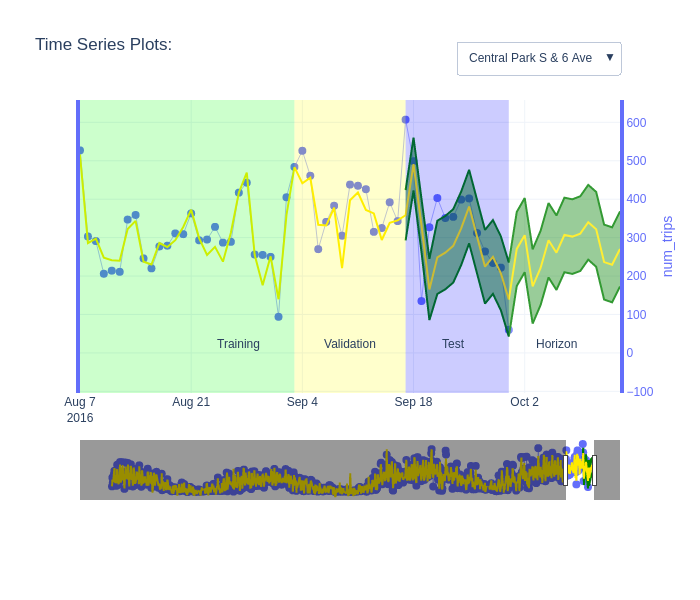

In [23]:
print('A Snapshot of the interactive plot:')
fig.show('png')

## Using SQL to Calculate Metrics

Some common metrics for evaluating forecasting effectiveness are 
- MAPE, or Mean Absolute Percentage Error
    - $\textrm{MAPE} = \frac{1}{n}\sum{\frac{\mid(actual - forecast)\mid}{actual}}$
- MAE, or Mean Absolute Error
     - $\textrm{MAE} = \frac{1}{n}\sum{\mid(actual - forecast)\mid}$
- MAE divided by average demand so it yields a % like MAPE
    - $\textrm{pMAE} = \frac{\sum{\mid(actual - forecast)\mid}}{\sum{actual}}$
- MSE, or Mean Squared Error
    - $\textrm{MSE} = \frac{1}{n}\sum{(actual-forecast)^2}$
- RMSE, or Root Mean Squared Error
    - $\textrm{RMSE} = \sqrt{\frac{1}{n}\sum{(actual-forecast)^2}}$
- RMSE divided by average demand so it yeilds a % like MAPE
    - $\textrm{pRMSE} = \frac{\sqrt{\frac{1}{n}\sum{(actual-forecast)^2}}}{\frac{1}{n}\sum{actual}}$

It can be helpful to explicity calculate these to make comparison between datasets and models fair.  This section demonstration these calculation with SQL.

>```sql
>(actual_value - forecast_value) as diff
>
>
>AVG(SAFE_DIVIDE(ABS(diff), actual_value)) as MAPE,
>AVG(ABS(diff)) as MAE,
>SAFE_DIVIDE(SUM(ABS(diff)), SUM(actual_value)) as pMAE,
>AVG(POW(diff, 2)) as MSE,
>SQRT(AVG(POW(diff, 2))) as RMSE,
>SAFE_DIVIDE(SQRT(AVG(POW(diff, 2))), AVG(actual_value)) as pRMSE
>```

In [24]:
query = f"""
    WITH    
        FORECAST AS (
            SELECT
                '{chosen_station}' AS {SERIES_COLUMN},
                EXTRACT(DATE FROM forecast_timestamp) AS {TIME_COLUMN},
                forecast_value,
                'forecast' as time_series_type
            FROM ML.FORECAST(
                MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_arimaplusxreg`,
                STRUCT({FORECAST_TEST_LENGTH} AS horizon, 0.95 AS confidence_level),
                (
                    SELECT {TIME_COLUMN}, {TARGET_COLUMN},
                        {', '.join(COVARIATE_COLUMNS)}
                    FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`
                    WHERE {SPLIT_COLUMN} = 'TEST'
                        AND {SERIES_COLUMN} = '{chosen_station}'
                )   
            )
        ),
        ACTUAL AS (
            SELECT {SERIES_COLUMN}, {TIME_COLUMN}, sum({TARGET_COLUMN}) as actual_value
            FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`
            WHERE {SPLIT_COLUMN} = 'TEST' AND {SERIES_COLUMN} = '{chosen_station}'
            GROUP BY {SERIES_COLUMN}, {TIME_COLUMN}
        ),
        COMBINED AS (
            SELECT *
            FROM FORECAST
            INNER JOIN ACTUAL
            USING ({SERIES_COLUMN}, {TIME_COLUMN})  
        ),
        DIFFS AS (
            SELECT {SERIES_COLUMN}, {TIME_COLUMN}, 'forecast' as time_series_type, 
                actual_value, forecast_value, (actual_value - forecast_value) as diff
            FROM COMBINED
        )
    SELECT {SERIES_COLUMN}, time_series_type, 
            AVG(SAFE_DIVIDE(ABS(diff), actual_value)) as MAPE,
            AVG(ABS(diff)) as MAE,
            SAFE_DIVIDE(SUM(ABS(diff)), SUM(actual_value)) as pMAE,
            AVG(POW(diff, 2)) as MSE,
            SQRT(AVG(POW(diff, 2))) as RMSE,
            SAFE_DIVIDE(SQRT(AVG(POW(diff, 2))), AVG(actual_value)) as pRMSE
    FROM DIFFS
    GROUP BY {SERIES_COLUMN}, time_series_type
    ORDER BY {SERIES_COLUMN}, time_series_type    
"""
customMetrics = bq.query(query = query).to_dataframe()
customMetrics.head(viz_limit)

,start_station_name,time_series_type,MAPE,MAE,pMAE,MSE,RMSE,pRMSE
0,Central Park S & 6 Ave,forecast,0.364184,84.869258,0.26005,12786.969584,113.079483,0.34649


Overall Metrics:

In [25]:
query = f"""
    WITH
        FORECAST AS (
            SELECT
                '{chosen_station}' AS {SERIES_COLUMN},
                EXTRACT(DATE FROM forecast_timestamp) AS {TIME_COLUMN},
                forecast_value,
                'forecast' as time_series_type
            FROM ML.FORECAST(
                MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_arimaplusxreg`,
                STRUCT({FORECAST_TEST_LENGTH} AS horizon, 0.95 AS confidence_level),
                (
                    SELECT {TIME_COLUMN}, {TARGET_COLUMN},
                        {', '.join(COVARIATE_COLUMNS)}
                    FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`
                    WHERE splits = 'TEST'
                        AND {SERIES_COLUMN} = '{chosen_station}'
                )   
            )
        ),
        ACTUAL AS (
            SELECT {SERIES_COLUMN}, {TIME_COLUMN}, sum({TARGET_COLUMN}) as actual_value
            FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`
            WHERE {SPLIT_COLUMN} = 'TEST'
            GROUP BY {SERIES_COLUMN}, {TIME_COLUMN}
        ),
        COMBINED AS (
            SELECT *
            FROM FORECAST
            INNER JOIN ACTUAL
            USING ({SERIES_COLUMN}, {TIME_COLUMN})  
        ),
        DIFFS AS (
            SELECT {SERIES_COLUMN}, {TIME_COLUMN}, 'forecast' as time_series_type, 
                actual_value, forecast_value, (actual_value - forecast_value) as diff
            FROM COMBINED
        )
    SELECT time_series_type, 
        AVG(SAFE_DIVIDE(ABS(diff), actual_value)) as MAPE,
        AVG(ABS(diff)) as MAE,
        SAFE_DIVIDE(SUM(ABS(diff)), SUM(actual_value)) as pMAE,
        AVG(POW(diff, 2)) as MSE,
        SQRT(AVG(POW(diff, 2))) as RMSE,
        SAFE_DIVIDE(SQRT(AVG(POW(diff, 2))), AVG(actual_value)) as pRMSE
    FROM DIFFS
    GROUP BY time_series_type
    ORDER BY time_series_type    
"""
customMetricsOverall = bq.query(query).to_dataframe()
customMetricsOverall

,time_series_type,MAPE,MAE,pMAE,MSE,RMSE,pRMSE
0,forecast,0.364184,84.869258,0.26005,12786.969584,113.079483,0.34649


---
## Anomaly Detection
Reference for [`ML.DETECT_ANOMALIES`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-detect-anomalies)

**NOTE** At this point in time (July 2023) the `ARIMA_PLUS_XREG` does not yet use the `ML.DETECT_ANOMALIES` function. This section will be completed once the feature is released.

---
## Remove Resources

To remove the model created in BigQuery uncomment the `bq.delete_model` statement and run the cell below:

In [26]:
# delete models created in BQ with BQML - this also removes them from Vertex AI Model Registry
model = bq.get_model(f'{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_arimaplusxreg')
#bq.delete_model(model)

---
# WORKAROUND For Not Having `time_series_id_col` Parameter

At this point (July 2023) the [`model_type = 'ARIMA_PLUS_XREG'`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-create-multivariate-time-series) can fit a single timeseries. In the future it will able to fit multiple timeseires like [`model_type = 'ARIMA_PLUS'`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-create-time-series) by using the parameter `time_series_id_col` to specify multiple time series.  A workaround for this is using writing SQL that creates the multiple timeseries models in a single query.   


Get a list of the timeseries and use the [ROW_NUMBER()](https://cloud.google.com/bigquery/docs/reference/standard-sql/numbering_functions#row_number) function to create integer id's for the distinct series:

In [57]:
query = f"""
SELECT ROW_NUMBER() OVER (ORDER BY {SERIES_COLUMN}) AS row_number, *
FROM
    (SELECT DISTINCT {SERIES_COLUMN}
    FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`)
"""
timeseries = bq.query(query).to_dataframe()
timeseries

,row_number,start_station_name
0,1,Central Park North & Adam Clayton Powell Blvd
1,2,Central Park S & 6 Ave
2,3,Central Park W & W 96 St
3,4,Central Park West & W 100 St
4,5,Central Park West & W 102 St
5,6,Central Park West & W 68 St
6,7,Central Park West & W 72 St
7,8,Central Park West & W 76 St
8,9,Central Park West & W 85 St
9,10,Grand Army Plaza & Central Park S


## Approach 1: Procedural Language

The [EXECUTE IMMEDIATE](https://cloud.google.com/bigquery/docs/reference/standard-sql/procedural-language#execute_immediate) statement from the BigQuery [Procedural language](https://cloud.google.com/bigquery/docs/reference/standard-sql/procedural-language) can be used to create dynamic SQL.  Combining this with a [FOR ... IN](https://cloud.google.com/bigquery/docs/reference/standard-sql/procedural-language#for-in) loop can create the multiple timeseries in sequence.

In [53]:
# relisting covariate columns without capacity, because some time series have all null values for capacity:
COVARIATE_COLUMNS = ['avg_tripduration', 'pct_subscriber', 'ratio_gender']

In [54]:
query = f"""
    FOR id IN (
        SELECT ROW_NUMBER() OVER (ORDER BY {SERIES_COLUMN}) AS row_number, *
        FROM
            (SELECT DISTINCT {SERIES_COLUMN}
            FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`)    
    ) DO
    EXECUTE IMMEDIATE
        CONCAT("CREATE OR REPLACE MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_arimaplusxreg_", id.row_number, "` OPTIONS (model_type = 'ARIMA_PLUS_XREG', time_series_timestamp_col = '{TIME_COLUMN}', time_series_data_col = '{TARGET_COLUMN}', data_frequency = '{FORECAST_GRANULARITY}', auto_arima_max_order = 5, holiday_region = ['GLOBAL', 'US'], horizon = {FORECAST_HORIZON_LENGTH} + {FORECAST_TEST_LENGTH}) AS SELECT {TIME_COLUMN}, {TARGET_COLUMN}, {', '.join(COVARIATE_COLUMNS)} FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}` WHERE {SPLIT_COLUMN} in ('TRAIN','VALIDATE') AND {SERIES_COLUMN} = '", id.{SERIES_COLUMN}, "'");
    END FOR;
"""
print(query)


    FOR id IN (
        SELECT ROW_NUMBER() OVER (ORDER BY start_station_name) AS row_number, *
        FROM
            (SELECT DISTINCT start_station_name
            FROM `statmike-mlops-349915.applied_forecasting.forecasting-data_prepped`)    
    ) DO
    EXECUTE IMMEDIATE
        CONCAT("CREATE OR REPLACE MODEL `statmike-mlops-349915.applied_forecasting.forecasting-data_prepped_arimaplusxreg_", id.row_number, "` OPTIONS (model_type = 'ARIMA_PLUS_XREG', time_series_timestamp_col = 'starttime', time_series_data_col = 'num_trips', data_frequency = 'DAILY', auto_arima_max_order = 5, holiday_region = ['GLOBAL', 'US'], horizon = 14 + 14) AS SELECT starttime, num_trips, avg_tripduration, pct_subscriber, ratio_gender FROM `statmike-mlops-349915.applied_forecasting.forecasting-data_prepped` WHERE splits in ('TRAIN','VALIDATE') AND start_station_name = '", id.start_station_name, "'");
    END FOR;



In [55]:
job = bq.query(query)
job.result()
print(job.state, (job.ended-job.started).total_seconds())

DONE 298.503


## Approach 2: Python Client With Async Jobs

Another approach is to use a client, in the case the Python client for BigQuery, to submit separate queries for each timeseries and managed them asynchronously.  This could result in faster total execution time if resources are available in your project.

In [63]:
timeseries = list(timeseries.itertuples(index = False, name = None))
timeseries

[(1, 'Central Park North & Adam Clayton Powell Blvd'),
 (2, 'Central Park S & 6 Ave'),
 (3, 'Central Park W & W 96 St'),
 (4, 'Central Park West & W 100 St'),
 (5, 'Central Park West & W 102 St'),
 (6, 'Central Park West & W 68 St'),
 (7, 'Central Park West & W 72 St'),
 (8, 'Central Park West & W 76 St'),
 (9, 'Central Park West & W 85 St'),
 (10, 'Grand Army Plaza & Central Park S'),
 (11, 'W 106 St & Central Park West'),
 (12, 'W 82 St & Central Park West')]

In [60]:
def make_model(ts):
    query = f"""
        # create a model for {SERIES_COLUMN} = '{ts[1]}'
        CREATE OR REPLACE MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_arimaplusxreg_{ts[0]}`
        OPTIONS
          (model_type = 'ARIMA_PLUS_XREG',
           time_series_timestamp_col = '{TIME_COLUMN}',
           time_series_data_col = '{TARGET_COLUMN}',
           #time_series_id_col = '{SERIES_COLUMN}',
           data_frequency = '{FORECAST_GRANULARITY}',
           auto_arima_max_order = 5,
           holiday_region = ['GLOBAL', 'US'],
           horizon = {FORECAST_HORIZON_LENGTH} + {FORECAST_TEST_LENGTH}
          ) AS
        SELECT {TIME_COLUMN}, {TARGET_COLUMN},
            {', '.join(COVARIATE_COLUMNS)}
        FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`
        WHERE {SPLIT_COLUMN} in ('TRAIN','VALIDATE')
            AND {SERIES_COLUMN} = '{ts[1]}'
    """
    return query

In [64]:
print(make_model(timeseries[0]))


        # create a model for start_station_name = 'Central Park North & Adam Clayton Powell Blvd'
        CREATE OR REPLACE MODEL `statmike-mlops-349915.applied_forecasting.forecasting-data_prepped_arimaplusxreg_1`
        OPTIONS
          (model_type = 'ARIMA_PLUS_XREG',
           time_series_timestamp_col = 'starttime',
           time_series_data_col = 'num_trips',
           #time_series_id_col = 'start_station_name',
           data_frequency = 'DAILY',
           auto_arima_max_order = 5,
           holiday_region = ['GLOBAL', 'US'],
           horizon = 14 + 14
          ) AS
        SELECT starttime, num_trips,
            avg_tripduration, pct_subscriber, ratio_gender
        FROM `statmike-mlops-349915.applied_forecasting.forecasting-data_prepped`
        WHERE splits in ('TRAIN','VALIDATE')
            AND start_station_name = 'Central Park North & Adam Clayton Powell Blvd'
    


In [67]:
from time import sleep

In [68]:
bqml_jobs = [bq.query(query = make_model(ts)) for ts in timeseries]

while not all([job.done() for job in bqml_jobs]):
    print('waiting on all jobs to finish ... sleeping for 5s')
    sleep(5)
for j, job in enumerate(bqml_jobs):
    print('Completed with Errors = ', job.error_result)

waiting on all jobs to finish ... sleeping for 5s
waiting on all jobs to finish ... sleeping for 5s
waiting on all jobs to finish ... sleeping for 5s
waiting on all jobs to finish ... sleeping for 5s
waiting on all jobs to finish ... sleeping for 5s
Completed with Errors =  None
Completed with Errors =  None
Completed with Errors =  None
Completed with Errors =  None
Completed with Errors =  None
Completed with Errors =  None
Completed with Errors =  None
Completed with Errors =  None
Completed with Errors =  None
Completed with Errors =  None
Completed with Errors =  None
Completed with Errors =  None


## Working With Multiple Models

Using the functions for models requires using the functions across all the separate models and combining results.  An example of doing this follows.  This uses Python to construct the query that unions all the separate model results into a single output set.

In [79]:
query = ""
for t, ts in enumerate(timeseries):
    query += f"""
        SELECT '{ts[1]}' as {SERIES_COLUMN}, *
        FROM ML.EVALUATE(
            MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_arimaplusxreg_{ts[0]}`,
            (
                SELECT {TIME_COLUMN}, {TARGET_COLUMN},
                    {', '.join(COVARIATE_COLUMNS)}
                FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`
                WHERE {SPLIT_COLUMN} = 'TEST'
                    AND {SERIES_COLUMN} = '{chosen_station}'
            ),
            STRUCT(TRUE AS perform_aggregation)
        )
    """
    if t < len(timeseries)-1: query += "UNION ALL"

In [80]:
#print(query)

In [81]:
metrics = bq.query(query).to_dataframe()
metrics

,start_station_name,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error,symmetric_mean_absolute_percentage_error
0,Central Park West & W 85 St,171.290795,40369.753440,200.922257,47.732383,63.836655
1,W 82 St & Central Park West,238.753145,72013.375008,268.353079,67.112579,105.230112
2,Central Park West & W 102 St,260.029256,83697.364612,289.304968,74.224959,122.457784
3,Central Park S & 6 Ave,84.885617,12792.523379,113.104038,36.419940,31.547787
4,W 106 St & Central Park West,241.481703,73739.378699,271.549956,68.005365,107.471750
5,Central Park W & W 96 St,202.442318,53031.090207,230.284802,56.376148,81.270972
6,Central Park West & W 76 St,214.290854,57026.501450,238.802222,62.764186,90.689374
7,Central Park West & W 72 St,121.883951,22554.630553,150.181991,41.739618,42.696262
8,Central Park West & W 100 St,257.895012,83302.784732,288.622218,72.864692,119.704992
9,Grand Army Plaza & Central Park S,119.004419,19427.657590,139.383132,41.644377,41.804210
